In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Step 1:Creating Datasets
#Streaming Data
data_streaming={
    'user_id':np.random.randint(1,1001,size=5000),
    'country':np.random.choice(['US','India','Canada','UK','Australia'],size=5000),
    'streaming_hours':np.random.uniform(0.5,10,size=5000),
    'subscription_plan':np.random.choice(['Basic','Standard','Premium'],size=5000),
    'date':pd.date_range(start='2024-01-01',periods=5000,freq='h').strftime('%Y-%m-%d')
}
df_streaming=pd.DataFrame(data_streaming)

In [20]:
#Cloud Data
data_cloud={
    'service_id':np.random.randint(1,101,size=1000),
    'resource_type':np.random.choice(['Compute','Storage','Networking'],size=1000),
    'usage_hours':np.random.uniform(1,100,size=1000),
    'cost':np.random.uniform(10,500,size=1000),
    'date':pd.date_range(start='2024-01-01',periods=1000,freq='D').strftime('%Y-%m-%d')
}
df_cloud=pd.DataFrame(data_cloud)

In [21]:
#Step 2:Metric Calculations
total_streaming_hours=df_streaming.groupby('user_id')['streaming_hours'].sum().reset_index()
total_streaming_hours.columns=['user_id','total_streaming_hours']

In [23]:
total_streaming_hours.head()

,user_id,total_streaming_hours
0,1,56.132055
1,2,36.096390
2,3,19.686271
3,4,14.814637
4,5,35.699836


In [25]:
#Average Cost per Service
average_cost_per_service=df_cloud.groupby('service_id')['cost'].mean().reset_index()
average_cost_per_service.columns=['service_id','average_cost']

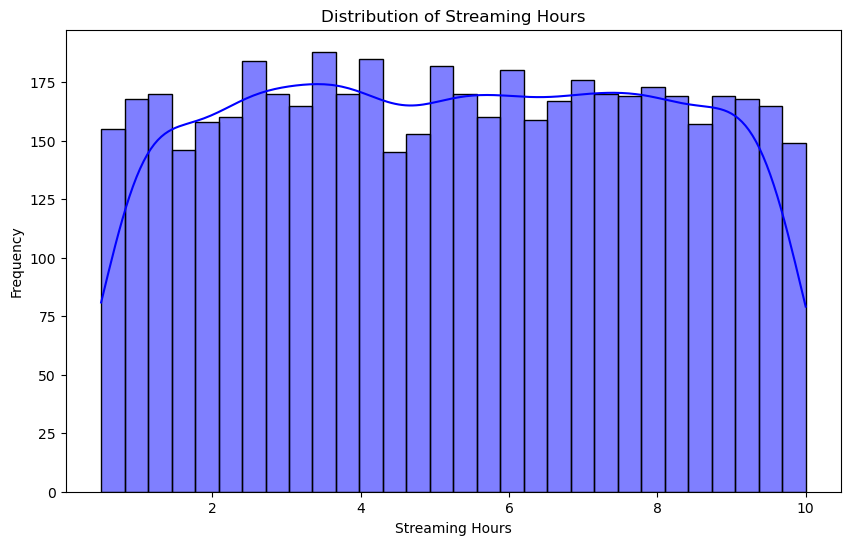

In [28]:
#Step 3:Visualization
#Streaming Hours Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df_streaming,x='streaming_hours',bins=30,kde=True,color='blue')
plt.title('Distribution of Streaming Hours')
plt.xlabel('Streaming Hours')
plt.ylabel('Frequency')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3240\1213378448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_hours,x='country',y='streaming_hours',palette='viridis')


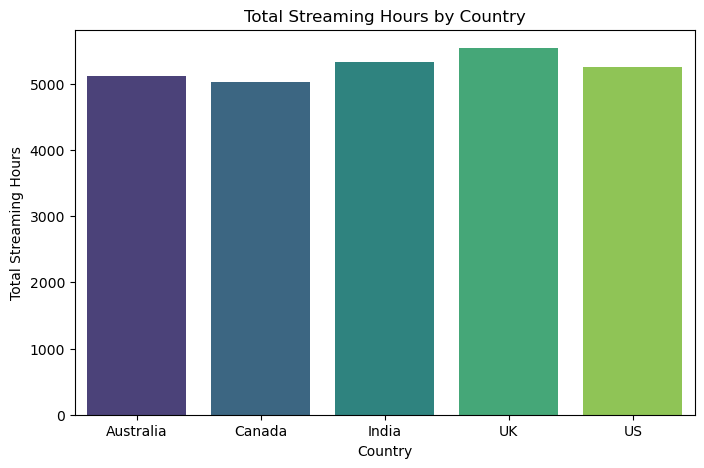

In [29]:
#Countrywise Total Streaming Hours
country_hours=df_streaming.groupby('country')['streaming_hours'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=country_hours,x='country',y='streaming_hours',palette='viridis')
plt.title('Total Streaming Hours by Country')
plt.xlabel('Country')
plt.ylabel('Total Streaming Hours')
plt.show()

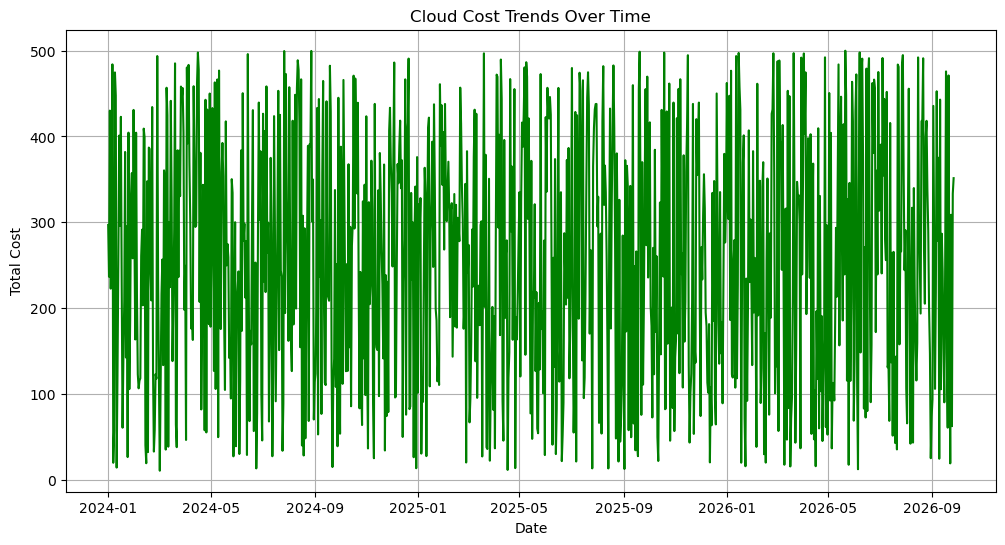

In [30]:
#Cloud Cost Trends Over Time
cost_trend = df_cloud.groupby('date')['cost'].sum().reset_index()
cost_trend['date'] = pd.to_datetime(cost_trend['date'])
plt.figure(figsize=(12, 6))
plt.plot(cost_trend['date'], cost_trend['cost'], color='green')
plt.title('Cloud Cost Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.grid()
plt.show()

In [32]:
#Step 4:Insights and Reports
#Cost Efficiency Calculation
efficiency=df_cloud['usage_hours']/df_cloud['cost']
mean_efficiency=np.mean(efficiency)
print(f"Average Cloud Efficiency(Usage Hours per Unit Cost):{mean_efficiency:.2f}")

Average Cloud Efficiency(Usage Hours per Unit Cost):0.41


In [33]:
#Exporting Country-wise Streaming Hours
df_streaming.groupby('country')['streaming_hours'].sum().reset_index().to_csv('streaming_hours_by_country.csv',index=False)
print("Exported 'streaming_hours_by_country.csv' successfully!")

Exported 'streaming_hours_by_country.csv' successfully!
